# Install Dependencies and Import Modules



In [ ]:
!pip install transformers accelerate einops sentencepiece

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import transformers
import torch

# Load the Model and Tokenizer

This may take a while. It also requires a lot of RAM.

In [3]:
model_path = "OpenAssistant/falcon-7b-sft-mix-2000"

In [4]:
tokenizer = AutoTokenizer.from_pretrained(model_path, use_fast=False)

In [ ]:
model = AutoModelForCausalLM.from_pretrained(model_path, trust_remote_code=True)
model.to("cuda:0")

# Your Prompt

You only need to change the prompt below.

In [6]:
prompt = "Describe a painting of a falcon hunting a llama in a very detailed way." #@param
prompt_template = f"<|prompter|>{prompt}<|endoftext|><|assistant|>"

This will generate the output:

In [7]:
tokens = tokenizer(prompt_template, return_tensors="pt").input_ids.to("cuda:0")
output = model.generate(input_ids=tokens, max_new_tokens=256, do_sample=True, temperature=0.8)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1259: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


In [8]:
# Print the generated text
print(tokenizer.decode(output[0]))

<|prompter|>Describe a painting of a falcon hunting a llama in a very detailed way.<|endoftext|><|assistant|>The painting features a majestic falcon perched on the back of a llama. The falcon has its talons dug into the llama's back, and its piercing gaze is fixed on its prey. The llama, on the other hand, is struggling to keep its balance, its legs splayed out to the side as it tries to navigate the treacherous terrain. The falcon's feathers are fluffed out, his wings stretched wide open as he prepares to strike. The llamas fur is matted down with sweat and dirt, its eyes wide with terror. The painting is done in a realistic style, with a detailed rendering of the animals and their surroundings.<|endoftext|>


Even without quantization, this model runs faster than falcon40B quantized or not.

### Resources used

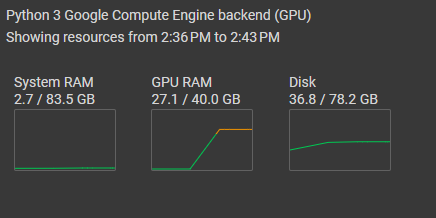